# Assignment 2

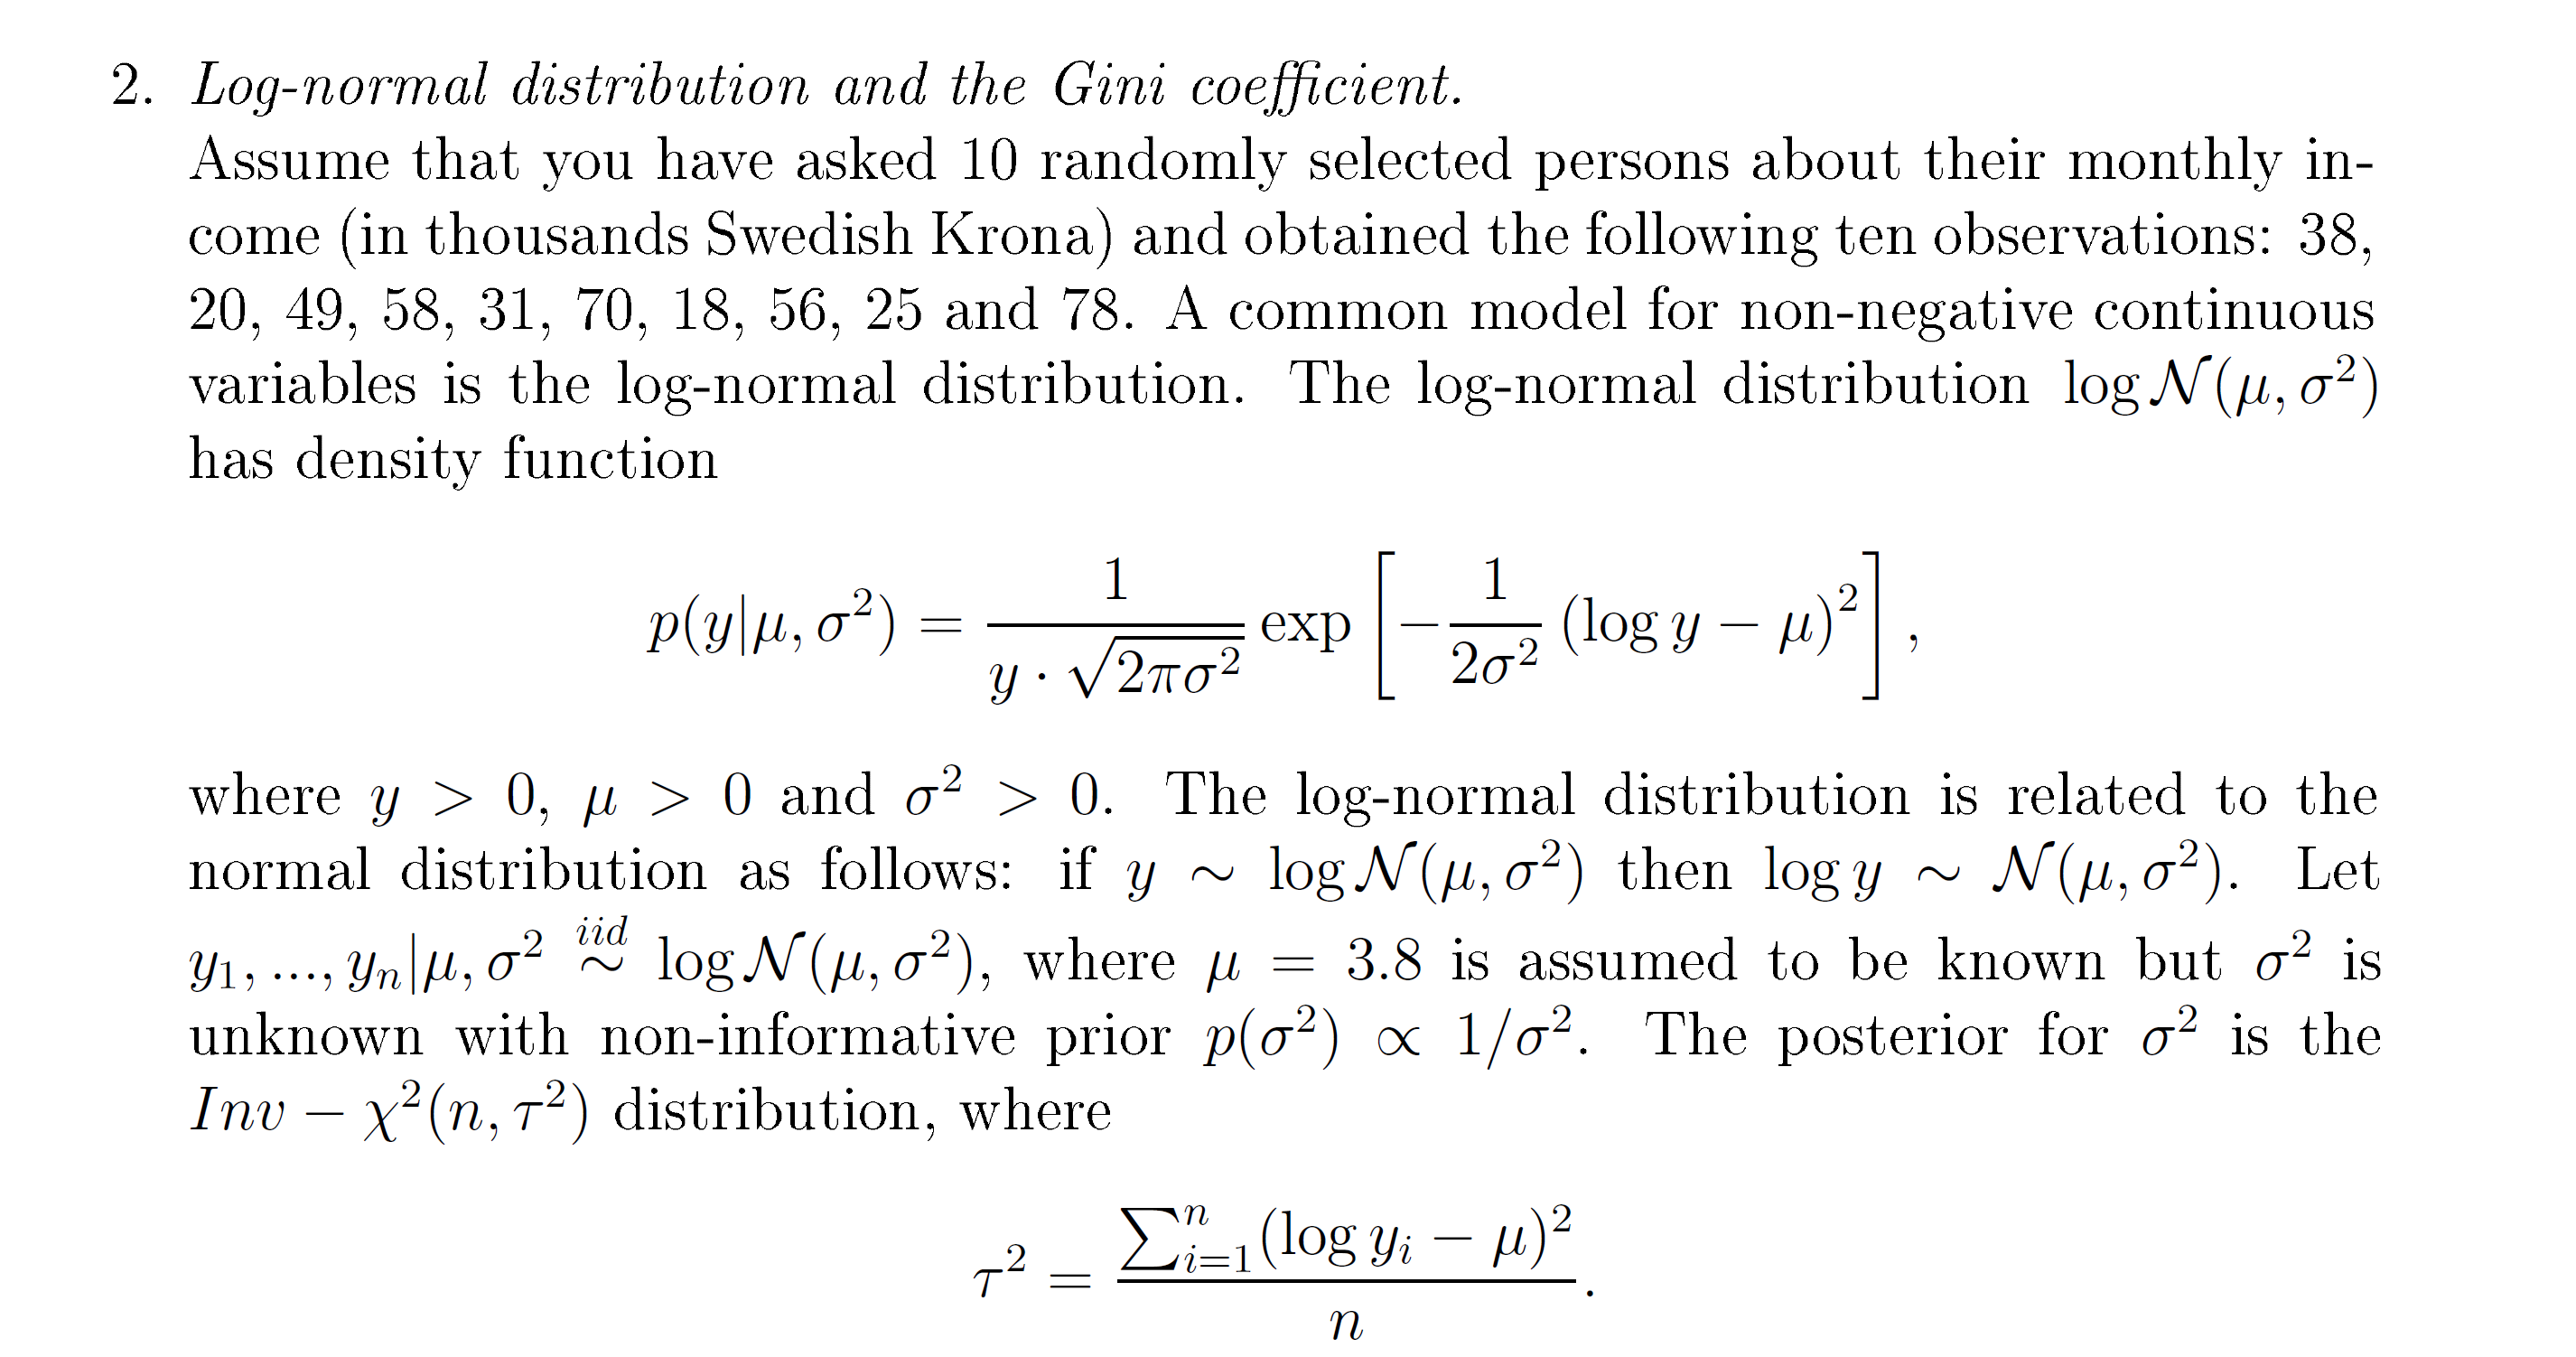




1- Simulate 10, 000 draws from the posterior of σ2 (assuming μ = 3.8) and com-
pare it with the theoretical Inv − χ2(n, τ 2) posterior distribution.

In [1]:
m = 10000 #sample size
mu = 3.8
observ = c(38,20, 49, 58, 31, 70, 18, 56, 25,78)
n = length(observ)


In [2]:
tau2 = function(data,mu){
    sum((log(data) -mu)^2 )/n
}

In [3]:
#install.packages('invgamma')
library(invgamma)
tau2(observ,mu )

[1] 0.2610437

In [4]:
post_sigma2 <- function(m){
    set.seed(12345)
    rinvchisq(n = m,df = n,ncp = tau2(observ,mu))
}

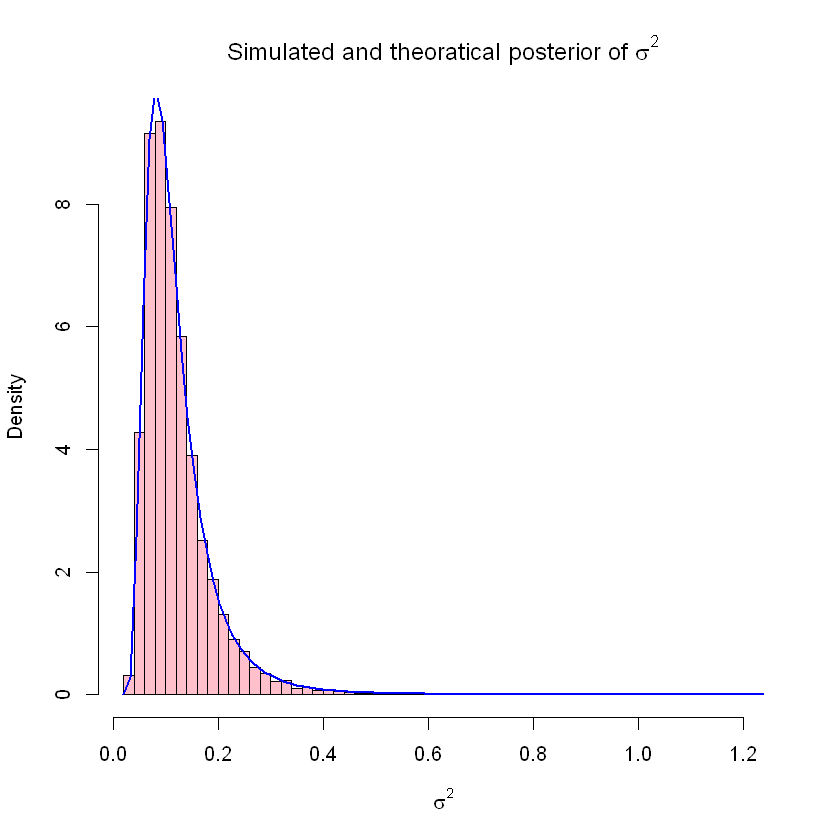

In [5]:
x <-seq( from =0, to =10 , by =0.001)
hist(post_sigma2(m),probability = TRUE,col='pink',breaks = 50,main=expression(paste('Simulated and theoratical posterior of ', sigma^2) ),
    ,xlab = expression(paste(sigma ^2)))
curve(dinvchisq(x ,df = n,ncp = tau2(observ,mu)),add=TRUE,col='blue',lwd=2)

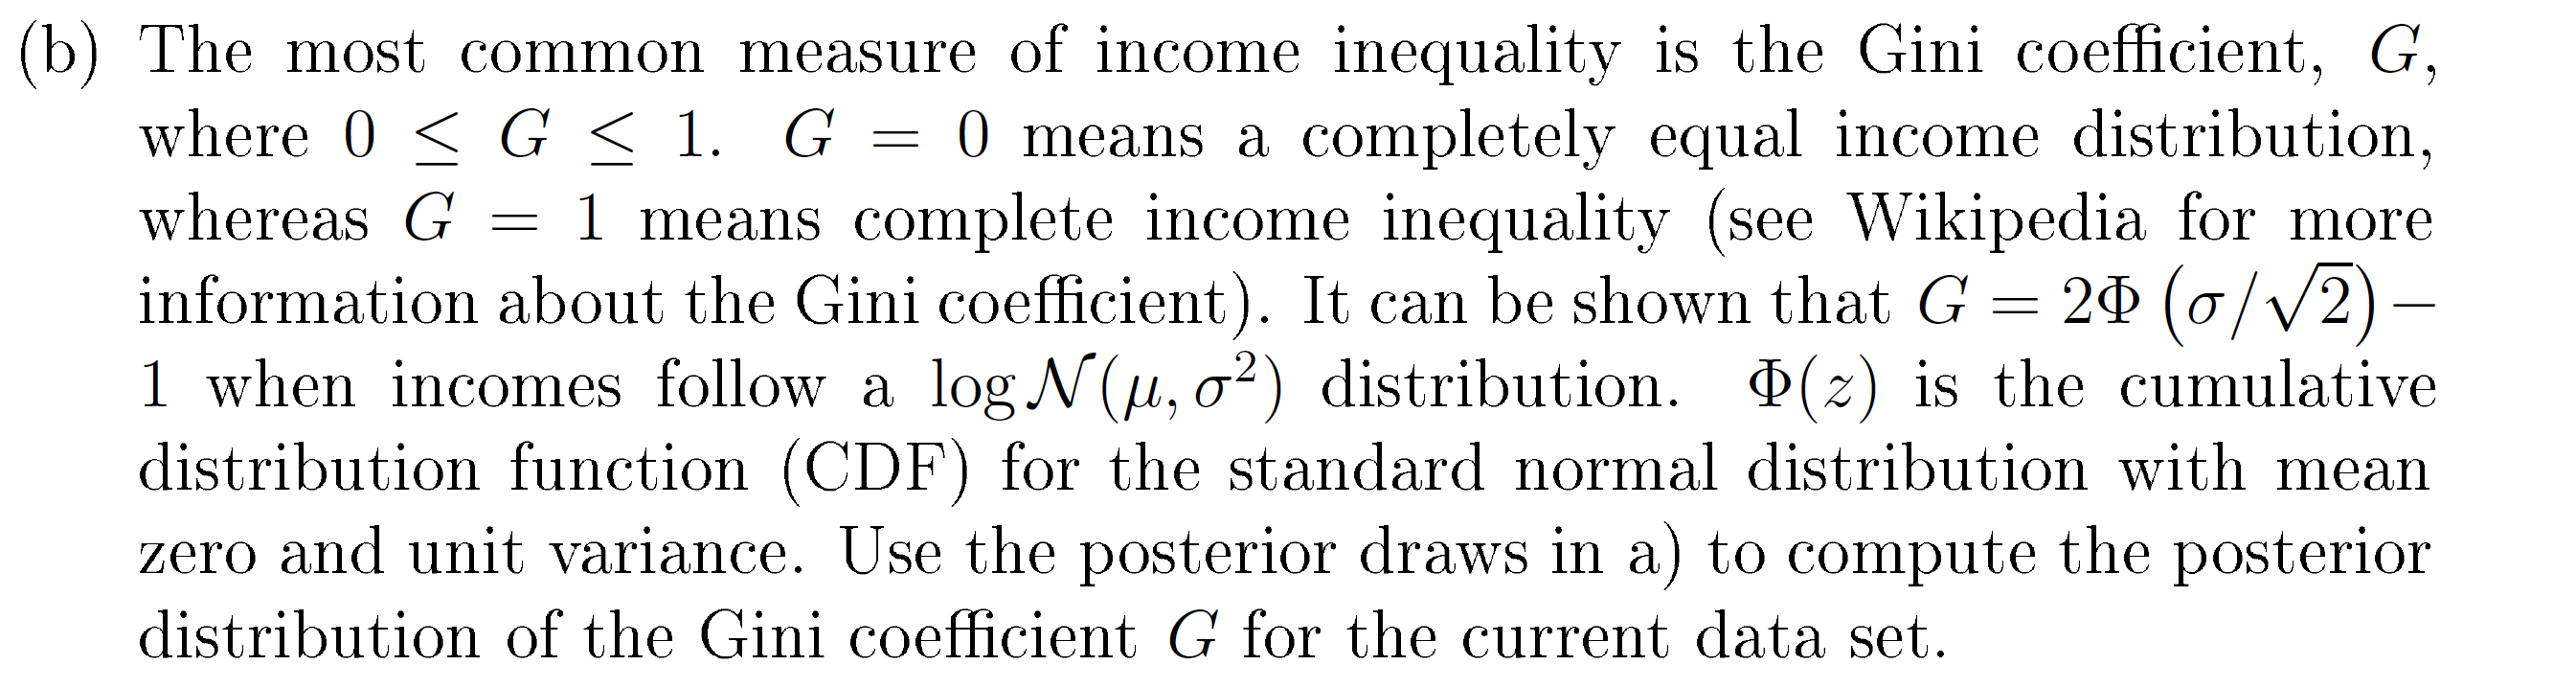

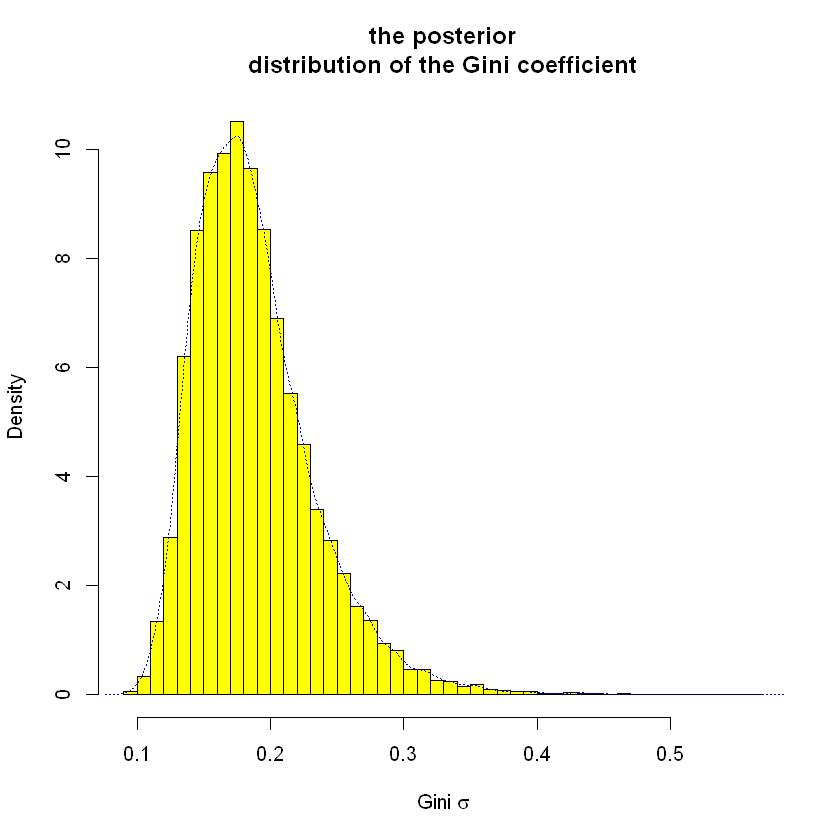

In [6]:
sigma2 = post_sigma2(m)
g_sigma = sqrt(sigma2)/sqrt(2) 
gpdf =2* pnorm(q = g_sigma,mean = 0,sd = 1)-1
hist(gpdf,probability = TRUE,col='yellow',breaks=50,main='the posterior
distribution of the Gini coefficient',xlab=expression(paste('Gini ', sigma)))
lines(density(gpdf),col='blue',lty=3)


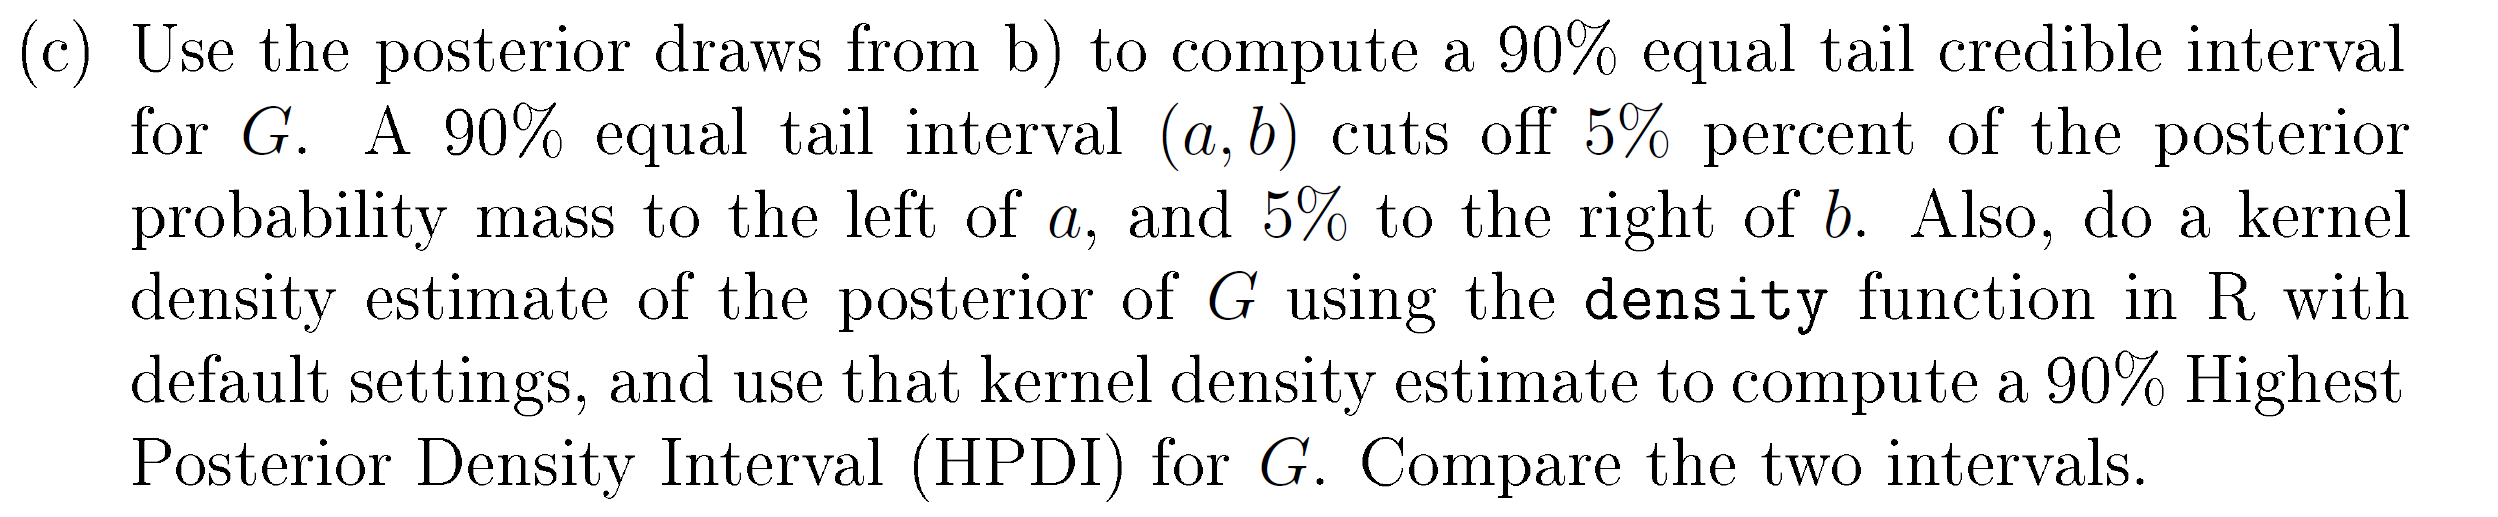

In [7]:
alpha_conf = 0.1
q_lower = quantile(gpdf,alpha_conf/2)
q_upper = quantile(gpdf,1-alpha_conf/2)
c(q_lower, q_upper)
true_mean = mean(gpdf)


5%       95% 
0.1307749 0.2719062

In [8]:
true_mean

[1] 0.1881068

HPD: shortest possible interval that under the posterior has the siginificance probability (ie. 0.9)

In [9]:
KerDenG=density(gpdf)
xx = KerDenG$x
yy = sort(KerDenG$y,decreasing = TRUE,index.return=TRUE)


we will use the cumulative sum of kernel density values to find the shortest interval in data that contains 0.9 of the data. 
the reason we can use cumulative to find HPD interval is because our data is unimodal.

In [27]:
CumSum = cumsum(yy$x)
HPD_D = CumSum[length(CumSum)]*0.9
temp = which(CumSum<HPD_D)
HPD_interval = range(xx[which(CumSum<HPD_D)])

In [42]:
df = data.frame('HPD_interval'=HPD_interval,'credible_interval'=c(q_lower, q_upper))
df

HPD_interval credible_interval
5%  0.07581361   0.1307749        
95% 0.20939241   0.2719062

In [78]:
library(ggplot2)

numeric(0)

In [48]:
# data frame with all information for the plot
df = data.frame(x = c(lower_equal,upper_equal,lower,upper),
y= c(0.5,0.5,0.7,0.7),
label = c("equal tail", "equal tail", "HPD", "HPD"))
plot_intervals = ggplot() +
geom_density(aes(x = gini_coef, y = ..density..),
color = "steelblue", fill = "lightblue") +
geom_line(mapping = aes(x = df$x, y = df$y, color = df$label), size =1)+
labs(title = "Posterior Distribution of Gini",
#subtitle = "95% Equal Tail Interval (a,b)",
x = "Gini Coefficients", color = "interval type")
cat(paste("The equal tail interval is ( ",equal_tail[1], ", ", equal_tail[2]," )",
"\nThe HPD interval is ( ",HPD[1], ", ", HPD[2]," )"))

[1] 0.07581361

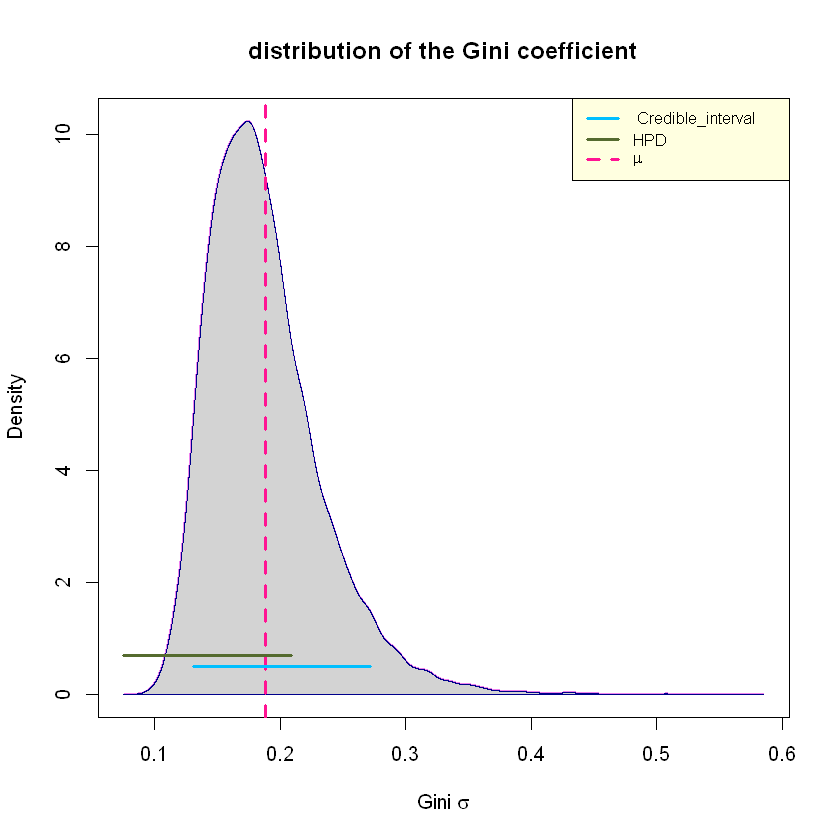

In [185]:
library(lattice)
y_temp=density(gpdf,n=10000)
plot(x=y_temp$x,y=y_temp$y,type = 'l', lwd = 2, col = 'violet',main= 'distribution of the Gini coefficient'
     ,xlab=expression(paste('Gini ', sigma)),ylab='Density')
polygon(x=y_temp$x,y=y_temp$y, col = 'lightgrey',border = 'darkblue')
abline(v = true_mean, col="deeppink", lwd=3, lty=2)
#abline(v=q_upper)
#abline(v=q_lower)
#abline(v=HPD_interval[1],col='blue')
#abline(v=HPD_interval[2],col='blue')

segments(x0 =q_lower,y0 =0.5,x1 =q_upper,y1 =  0.5,col='deepskyblue1' ,lwd=3)
segments(x0=HPD_interval[1],y0=0.7,x1=HPD_interval[2],y=0.7,col='darkolivegreen',lwd=3)

legend("topright", 
  legend = c(" Credible_interval", "HPD",expression(mu)), 
  col = c('deepskyblue1','darkolivegreen','deeppink'), lty=c(1,1,2), cex=0.8,lwd=3,bg='lightyellow')
                

# Assignment 3

 Bayesian inference for the concentration parameter in the von Mises distribution.
This exercise is concerned with directional data. The point is to show you that
the posterior distribution for somewhat weird models can be obtained by plotting
it over a grid of values. The data points are observed wind directions at a given
location on ten dierent days. The data are recorded in degrees:
(40, 303, 326, 285, 296, 314, 20, 308, 299, 296),
where North is located at zero degrees (see Figure 1 on the next page, where the
angles are measured clockwise). To fit with Wikipedias description of probability
distributions for circular data we convert the data into radians −π ≤ y ≤ π . The
10 observations in radians are
(−2.44, 2.14, 2.54, 1.83, 2.02, 2.33, −2.79, 2.23, 2.07, 2.02).


distributions for circular data we convert the data into radians  . The
10 observations in radians are

(−2.44, 2.14, 2.54, 1.83, 2.02, 2.33, −2.79, 2.23, 2.07, 2.02).

Assume that these data points are independent observations following the von Mises
distribution

exp [κ · cos(y − μ)]
p(y|μ, κ) =
 , −π ≤ y ≤ π,
2πI0 (κ)

where I0(κ) is the modied Bessel function of the rst kind of order zero [see
?besselI in R]. The parameter μ (−π ≤ μ ≤ π ) is the mean direction and κ > 0 is
called the concentration parameter. Large κ gives a small variance around μ, and
vice versa. Assume that μ is known to be 2.39. Let κ ∼ Exponential(λ = 1) a
priori, where λ is the rate parameter of the exponential distribution (so that the
mean is 1/λ).

(a) Plot the posterior distribution of κ for the wind direction data over a ne grid
of κ values.

(b) Find the (approximate) posterior mode of κ from the information in a).


#(a)
$$p(\kappa \mid y_1,y_2,...,y_n) \propto p(y_1,y_2,..., y_n \mid \kappa) \cdot p(\kappa)$$

$$p(\kappa \mid y_1,y_2,...,y_n) \propto \left[\frac{1}{I_0(\kappa)}\right]^n \cdot \exp\left[\sum_{i=1}^{n} \kappa \cdot cos(y_i - \mu)-\lambda \kappa\right]$$

$$p(\kappa \mid y_1,y_2,...,y_n) \propto \left[\frac{1}{I_0(\kappa)}\right]^n \cdot \exp\left[\sum_{i=1}^{n} \kappa \cdot cos(y_i - 2.39)-\kappa\right]$$



In [8]:
y_data =c(-2.44, 2.14, 2.54, 1.83, 2.02, 2.33, -2.79, 2.23, 2.07, 2.02)

In [9]:
n =length(y_data)
mu = 2.39
n

[1] 10

In [10]:
# a function to compute prior for k (exponential with lambda = 1)
prior_k <- function(k){
    dexp(x = k,rate = 1)
}

In [11]:
likelikood_k <- function(y,mu ,n,k){
    
    exp(k*sum(cos(y-mu)))/(2*pi*besselI(k,nu = 0)^n)
}

In [12]:
k= seq(from = 0,to = 20,by = 0.01)

In [13]:
#
posterior_k <- function(y=y_data,mu=mu ,n=n,k=k){
    likelikood_k(y,mu ,n,k )*prior_k(k)
}


In [14]:
post=posterior_k(y=y_data,mu=mu ,n=n,k=k)

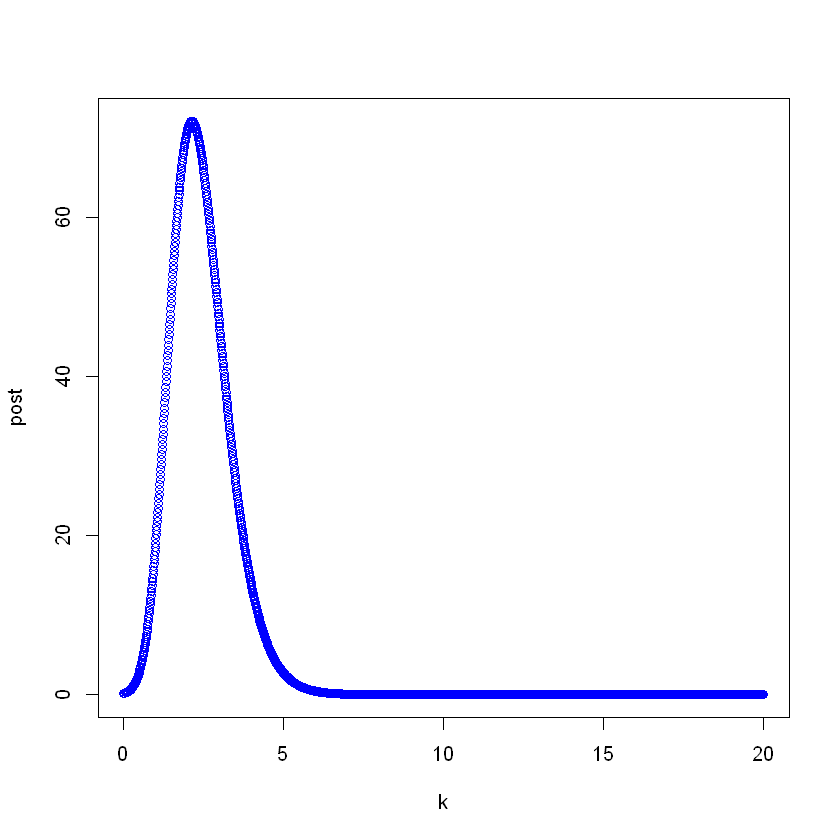

In [28]:
plot(y=post,x=k,col='blue')


In [16]:
k[which.max(post)]

[1] 2.12

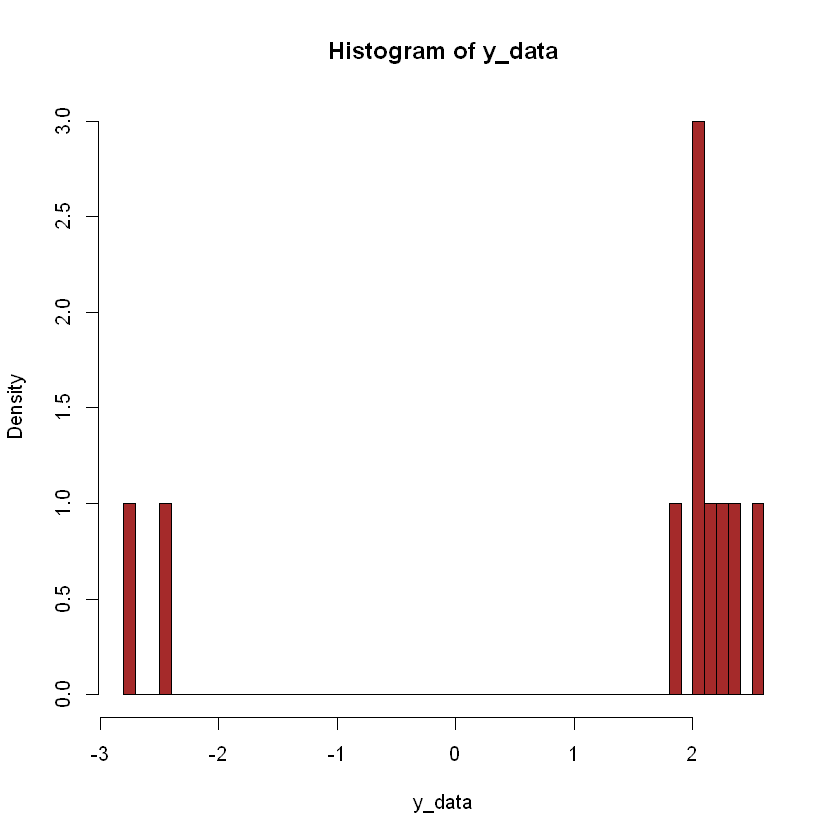

In [19]:
hist(y_data,probability = TRUE,breaks = 50,col='brown')

In [18]:
y_data[which(y_data<0)]

[1] -2.44 -2.79